<h1>Atividade 1 - Parte A – Reconhecimento de Imagens e Visão Computacional</h1>

Aluno: Aderson Lucas Guimarães Mendonça Medeiros<br>
Matrícula: 1831143043

<b>Exercício 1</b>

a) Crie uma função (em Python)  que seja capaz de reduzir e/ou aumentar a resolução espacial de uma imagem por um fator n, que é um número real positivo (n>1 para um aumento da resolução espacial e n< 1 para uma redução da resolução espacial).  Tal função deve possuir como parâmetros de entrada, o nome do arquivo da imagem para leitua no disco e o fator n. Para aumento da resolução utilize a técnica do vizinho-mais-próximo vista em sala de aula. 

In [2]:
# imports packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def rescale_image(image, proportion, interpolation=None):
    if type(image) == str:
        image = cv2.imread(image)
    elif type(image) == np.ndarray:
        image = image
    if proportion >= 1:
        if interpolation == 'vizinho':
            image = rescale_image_neighbor(image, proportion)
        elif interpolation == 'bilinear':
            image = rescale_image_bilinear(image, proportion)
            
    elif proportion > 0:
        proportion_division = 1/proportion
        row, col, _ = image.shape
        row_scale = [r for r in range(row) if not (int(r%proportion_division) == 0)]
        col_scale = [c for c in range(col) if not (int(c%proportion_division) == 0)]
        image = np.delete(image, row_scale, axis=0)
        image = np.delete(image, col_scale, axis=1)
    
    return image

In [7]:
def rescale_image_neighbor(image, proportion):
    row, col, _ = image.shape
    new_row, new_col, _ = [entry*proportion for entry in image.shape]
    row_index = 1
    resto_sum = 0
    row_expanded_index = np.array([], dtype=int)
    while row_index < new_row:
        qtd_row_insert = proportion - 1
        while qtd_row_insert >= 0:
            if qtd_row_insert >= 1:
                image = np.insert(image, row_index, 0, axis=0)
                row_expanded_index = np.append(row_expanded_index, [row_index], axis=0)
                row_index += 1
                qtd_row_insert -= 1
            elif qtd_row_insert >= 0:
                resto_sum += qtd_row_insert
                row_index += 1
                qtd_row_insert -= 1
            if resto_sum >= 1:
                image = np.insert(image, row_index, 0, axis=0)
                row_expanded_index = np.append(row_expanded_index, [row_index], axis=0)
                row_index += 1
                resto_sum -= 1
            row, _, _ = image.shape

    col_index = 1
    resto_sum = 0
    col_expanded_index = np.array([], dtype=int)
    while col_index < new_col:
        qtd_col_insert = proportion - 1
        while qtd_col_insert >= 0:
            if qtd_col_insert >= 1:
                image = np.insert(image, col_index, 0, axis=1)
                col_expanded_index = np.append(col_expanded_index, [col_index], axis=0)
                col_index += 1
                qtd_col_insert -= 1
            elif qtd_col_insert >= 0:
                resto_sum += qtd_col_insert
                col_index += 1
                qtd_col_insert -= 1
            if resto_sum >= 1:
                image = np.insert(image, col_index, 0, axis=1)
                col_expanded_index = np.append(col_expanded_index, [col_index], axis=0)
                col_index += 1
                resto_sum -= 1
            _, col, _ = image.shape
                
    for row_index in row_expanded_index:
        for i in range(len(image[row_index][:])):
            image[row_index][i] = image[row_index-1][i]
    for col_index in col_expanded_index:
        for i in range(len(image[:][col_index])):
            image[i][col_index] = image[i][col_index-1]
    return image

In [480]:
def rescale_image_bilinear(image, proportion):
    row, col, _ = image.shape
    new_row, new_col, _ = [entry*proportion for entry in image.shape]
    row_index = 1
    resto_sum = 0
    row_expanded_index = np.array([], dtype=int)
    while row_index < new_row:
        qtd_row_insert = proportion - 1
        while qtd_row_insert >= 0:
            if qtd_row_insert >= 1:
                image = np.insert(image, row_index, 0, axis=0)
                col_insert_mean = 0
                while col_insert_mean < image.shape[1]:
                    image[row_index, col_insert_mean] = \
                        (image[row_index-1, col_insert_mean] + image[row_index+1, col_insert_mean])/2
                    col += 1
                row_expanded_index = np.append(row_expanded_index, [row_index], axis=0)
                row_index += 1
                qtd_row_insert -= 1
            elif qtd_row_insert >= 0:
                resto_sum += qtd_row_insert
                row_index += 1
                qtd_row_insert -= 1
            if resto_sum >= 1:
                image = np.insert(image, row_index, 0, axis=0)
                row_expanded_index = np.append(row_expanded_index, [row_index], axis=0)
                col = 0
                while col < image.shape[1] and row_index + 1 < image.shape[0] and row_index - 1 > image.shape[0]:
                    image[row_index, col] = (image[row_index-1, col] + image[row_index+1, col])/2
                    col += 1
                row_index += 1
                resto_sum -= 1
            row, _, _ = image.shape

#     col_index = 1
#     resto_sum = 0
#     col_expanded_index = np.array([], dtype=int)
#     while col_index < new_col:
#         qtd_col_insert = proportion - 1
#         while qtd_col_insert >= 0:
#             if qtd_col_insert >= 1:
#                 image = np.insert(image, col_index, 0, axis=1)
#                 col_expanded_index = np.append(col_expanded_index, [col_index], axis=0)
#                 row_insert_mean = 0
#                 while row_insert_mean < image.shape[0] and col_index + 1 < image.shape[1] and col_index - 1 > image.shape[1]:
#                     image[row_index, col_index] = (image[row_index-1, col_index] + image[row_index+1, col_index])/2
#                     col += 1
#                 col_index += 1
#                 qtd_col_insert -= 1
#             elif qtd_col_insert >= 0:
#                 resto_sum += qtd_col_insert
#                 col_index += 1
#                 qtd_col_insert -= 1
#             if resto_sum >= 1:
#                 image = np.insert(image, col_index, 0, axis=1)
#                 col_expanded_index = np.append(col_expanded_index, [col_index], axis=0)
#                 col_index += 1
#                 resto_sum -= 1
#             _, col, _ = image.shape
    
    return image

In [9]:
# Show images
def show_subplots_image(image_array, nrow,ncol,fig_size_array, cmap=None):
    fig, axes = plt.subplots(nrow, ncol, figsize=fig_size_array)
    for ax, image in zip(axes.flatten(), image_array):
        ax.axis('off')
        fig.tight_layout()
        ax.imshow(image, cmap=cmap)

b) Utilize o sua função do item anterior para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16. Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original. Há diferenças de qualidade entre estas imagens? Comente. (Obs.: Plote os resultados para que possam se visualizados).

In [124]:
original_image = cv2.imread('imagens/lenna.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR)
original_image = (original_image - np.min(original_image))/(np.max(original_image) - np.min(original_image))

In [432]:
imagem1_2 = rescale_image(original_image, proportion=1/2)
imagem1_4 = rescale_image(original_image, proportion=1/4)
imagem1_8 = rescale_image(original_image, proportion=1/8)
imagem1_16 = rescale_image(original_image, proportion=1/16)

images_to_plot_rescale = [imagem1_2, imagem1_4, imagem1_8, imagem1_16]

In [5]:
# images_to_plot_vizinho = np.copy(images_to_plot_rescale)
for image_idx, image_resize in enumerate(images_to_plot_rescale):
    image_ones = np.ones(original_image.shape)
    for i in range(image_ones.shape[0]):
        for j in range(image_ones.shape[1]):
            if i < image_resize.shape[0] and j < image_resize.shape[1]:
                image_ones[i,j] = image_resize[i,j]
            else:
                image_zeros[i,j] = original_image[i,j]
    images_to_plot_rescale[image_idx] = image_ones

NameError: name 'images_to_plot_rescale' is not defined

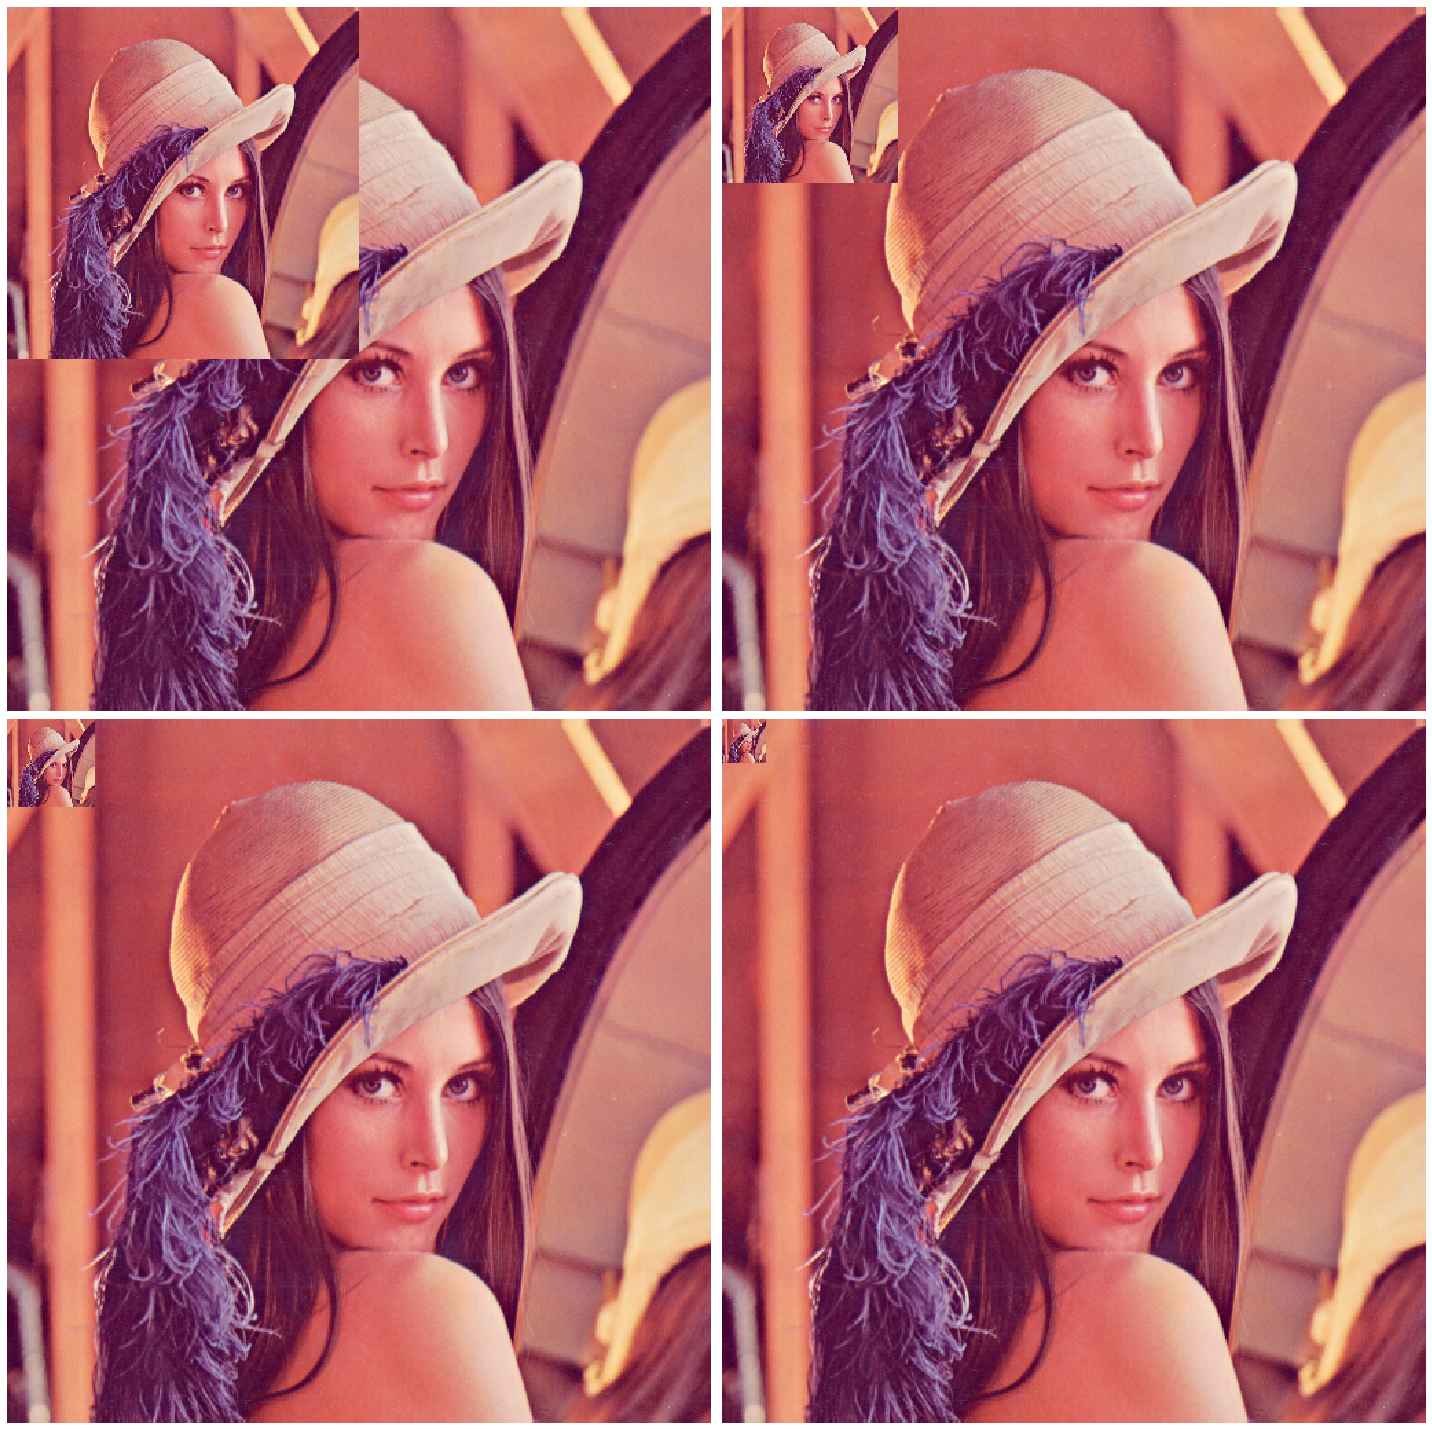

In [33]:
# Show images
IMAGE_SIZE=[20,20]
show_subplots_image(images_to_plot_rescale, 2, 2, IMAGE_SIZE)

In [16]:
imagem2_vizinho = rescale_image(imagem1_2, proportion=2, interpolation='vizinho')
imagem4_vizinho = rescale_image(imagem1_4, proportion=4, interpolation='vizinho')
imagem8_vizinho = rescale_image(imagem1_8, proportion=8, interpolation='vizinho')
imagem16_vizinho = rescale_image(imagem1_16, proportion=16, interpolation='vizinho')

images_to_plot_vizinho = [imagem2_vizinho, imagem4_vizinho, imagem8_vizinho, imagem16_vizinho]

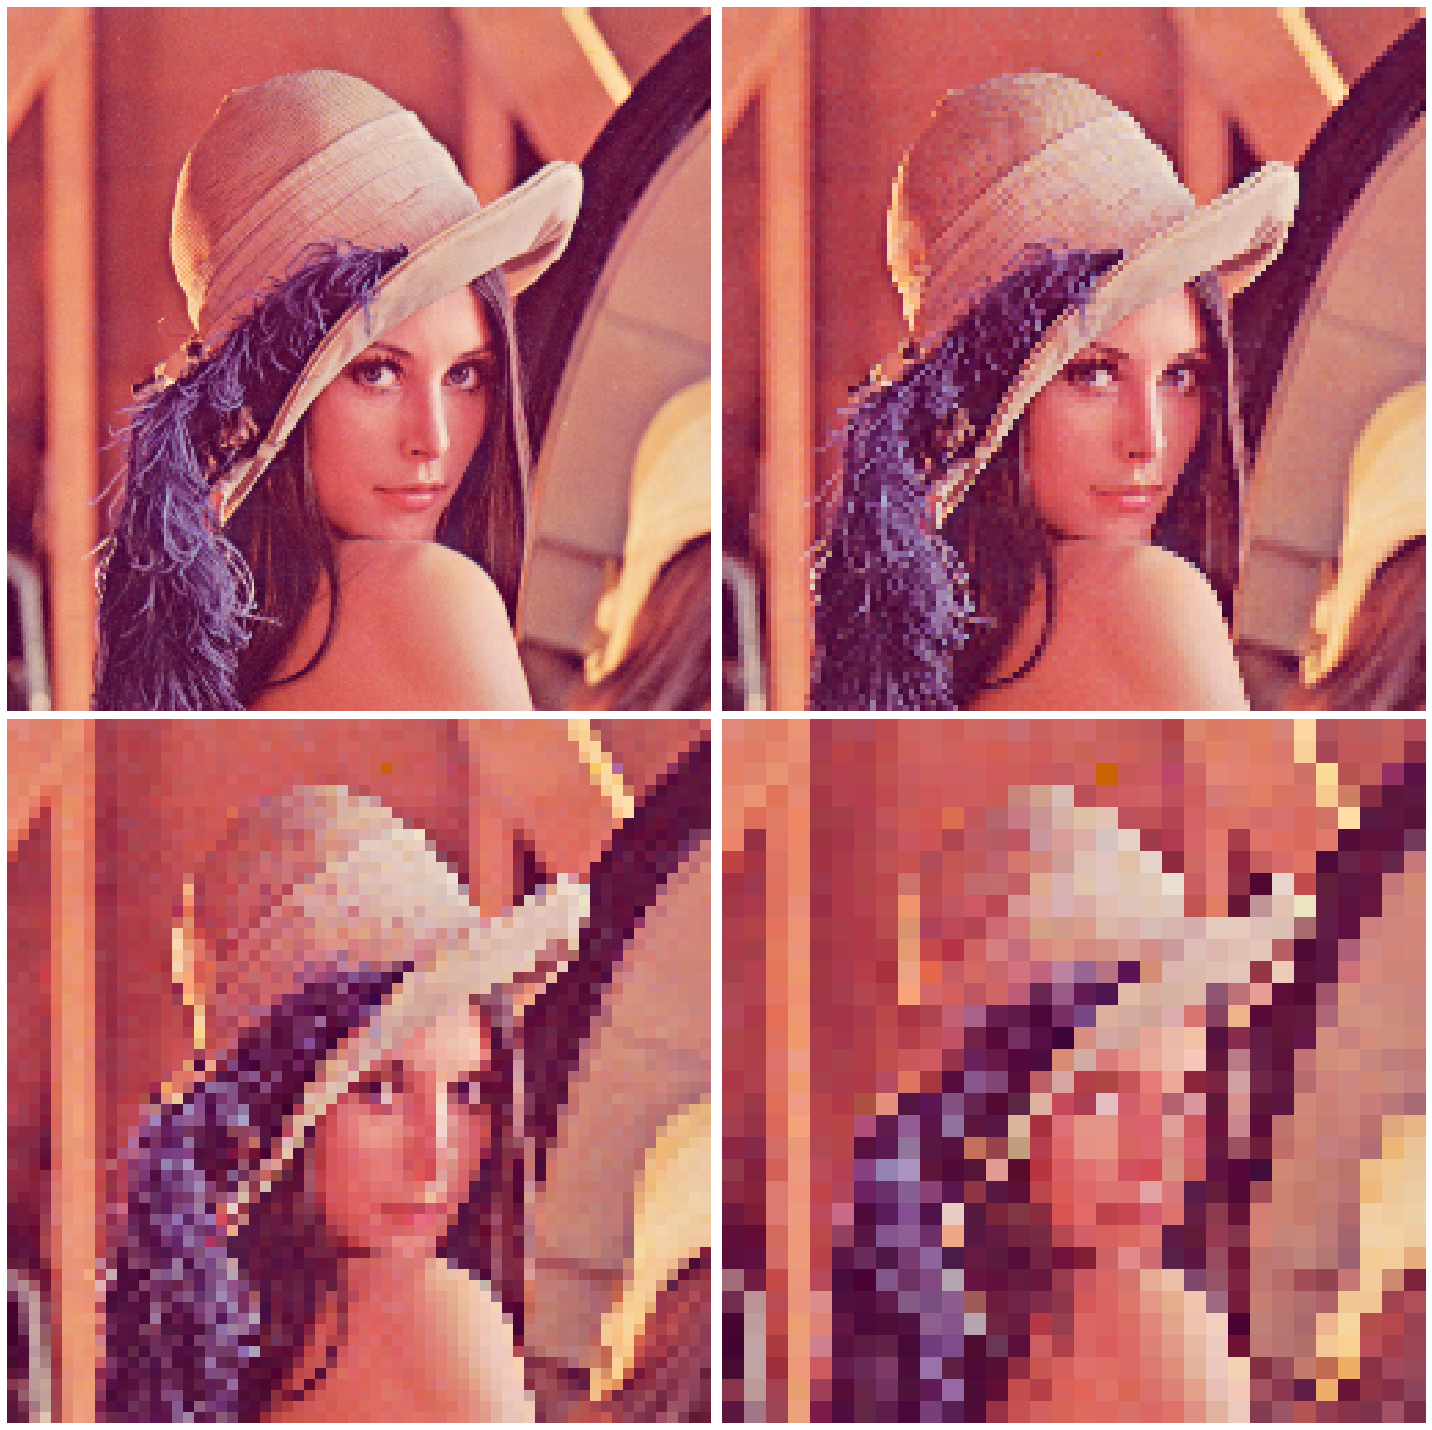

In [17]:
# Show images
show_subplots_image(images_to_plot_vizinho, 2, 2, IMAGE_SIZE)

c) Modifique a função desenvolvida em (a), de forma que seja utilizada a técnica de interpolação bilinear e refaça o que se pede no item (b) novamente. (Obs.: Plote os resultados para que possam se visualizados). 

In [473]:
imagem2_bilinear = rescale_image(imagem1_2, proportion=2, interpolation='bilinear')
imagem4_bilinear = rescale_image(imagem1_4, proportion=4, interpolation='bilinear')
imagem8_bilinear = rescale_image(imagem1_8, proportion=8, interpolation='bilinear')
imagem16_bilinear = rescale_image(imagem1_16, proportion=16, interpolation='bilinear')

images_to_plot_bilinear = [imagem2_bilinear, imagem4_bilinear, imagem8_bilinear, imagem16_bilinear]

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255
257
259
261
263
265
267
269
271
273
275
277
279
281
283
285
287
289
291
293
295
297
299
301
303
305
307
309
311
313
315
317
319
321
323
325
327
329
331
333
335
337
339
341
343
345
347
349
351
353
355
357
359
361
363
365
367
369
371
373
375
377
379
381
383
385
387
389
391
393
395
397
399
401
403
405
407
409
411
413
415
417
419
421
423
425
427
429
431
433
435
437
439
441
443
445
447
449
451
453
455
457
459
461
463
465
467
469
471
473
475
477
479
481
483
485
487
489
491
493
495
497
499
501
503
505
507
509
511
1
2
3
5
6
7
9
10
11
13
14
15
17

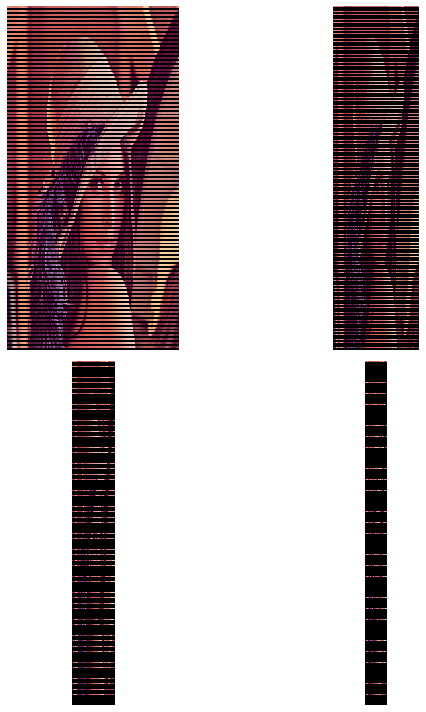

In [474]:
# Show images
show_subplots_image(images_to_plot_bilinear, 2, 2, IMAGE_SIZE)

<b>Exercício 2</b>

a) Escreva uma função que realize a filtragem espacial de uma imagem. Essa função terá 2 parâmetros de entrada:  a imagem a ser transformada e o filtro a ser utilizado.

In [444]:
def filtragem_espacial(image, filtro, normalized=False):
    shape_row = np.copy(np.array(image.shape))
    shape_row[0] = 1
    imagem_insert_padding = np.concatenate((np.zeros(shape_row), image), axis=0)
    imagem_insert_padding = np.concatenate((imagem_insert_padding, np.zeros(shape_row)), axis=0)
    shape_col = np.copy(np.array(imagem_insert_padding.shape))
    shape_col[1] = 1
    imagem_insert_padding = np.concatenate((np.zeros(shape_col), imagem_insert_padding), axis=1)
    imagem_insert_padding = np.concatenate((imagem_insert_padding, np.zeros(shape_col)), axis=1)
    
    image_filtered = np.zeros(image.shape)
    
    for i in range(imagem_insert_padding.shape[0] - filtro.shape[0]):
        for j in range(imagem_insert_padding.shape[1] - filtro.shape[1]):
            cell_result = np.zeros(imagem_insert_padding[i][j].shape)
            for r in range(filtro.shape[0]):
                for c in range(filtro.shape[1]):
                    cell_result += np.dot(imagem_insert_padding[i+r][j+c],filtro[r][c])
            image_filtered[i][j] = cell_result
    
    if normalized == True:
        image_filtered = image_filtered
    else:
        image_filtered = (image_filtered - np.min(image_filtered))/(np.max(image_filtered) - np.min(image_filtered))
    return image_filtered

b) Aplique os filtros abaixo na imagem da Lena (que foi enviada com o trabalho). Compare os resultados obtidos para cada um dos filtros. Com base nestes resultados, qual o tipo de filtro (passa-alta, passa
baixa, passa-faixa, etc.)  que está sendo utilizado em cada caso e qual o efeito de cada filtro na imagem.

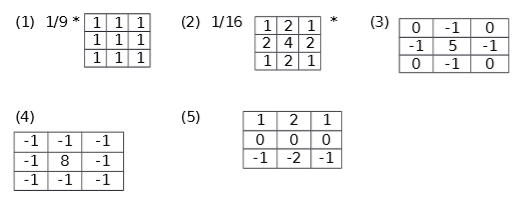

In [20]:
# Filtros
filtro_1 = np.array(np.dot((1/9),[[1,1,1],[1,1,1],[1,1,1]]))
filtro_2 = np.array(np.dot((1/16),[[1,2,1],[2,4,2],[1,2,1]]))
filtro_3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
filtro_4 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
filtro_5 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [23]:
# Gerar as imagens
image_filtered_1 = filtragem_espacial(original_image, filtro_1)
image_filtered_2 = filtragem_espacial(original_image, filtro_2)
image_filtered_3 = filtragem_espacial(original_image, filtro_3)
image_filtered_4 = filtragem_espacial(original_image, filtro_4)
image_filtered_5 = filtragem_espacial(original_image, filtro_5)

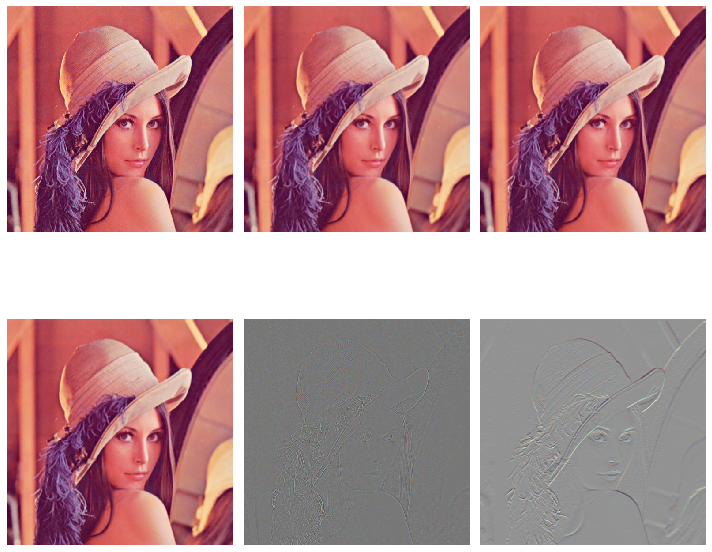

In [24]:
# Show images
IMAGE_SIZE = [10,10]
images_to_plot_filtered = \
    [original_image, image_filtered_1, image_filtered_2, image_filtered_3, image_filtered_4, image_filtered_5]
show_subplots_image(images_to_plot_filtered, 2, 3, IMAGE_SIZE)

c) O filtro 1 possui tamanho 3x3. O que aconteceria se aumentássemos o tamanho do filtro para 11x11, 17x17 ou 35x35? De que forma o tamanho do filtro afeta a imagem?

In [441]:
# Filtros
filtro_3 = np.dot((1/9), np.ones((3,3)))
filtro_11 = np.dot((1/9), np.ones((11,11)))
filtro_17 = np.dot((1/9), np.ones((17,17)))
filtro_35 = np.dot((1/9), np.ones((35,35)))

In [445]:
# Gerar as imagens
image_filtered_3 = filtragem_espacial(original_image, filtro_3, normalized=True)
image_filtered_11 = filtragem_espacial(original_image, filtro_11, normalized=True)
image_filtered_17 = filtragem_espacial(original_image, filtro_17, normalized=True)
image_filtered_35 = filtragem_espacial(original_image, filtro_35, normalized=True)

images_to_plot_filtered = [image_filtered_3, image_filtered_11, image_filtered_17, image_filtered_35]

In [451]:
image_filtered_11

array([[[ 9.81878307,  5.7962963 ,  5.11772487],
        [10.80643739,  6.36816578,  5.63227513],
        [10.80511464,  6.36243386,  5.62610229],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[10.79717813,  6.35846561,  5.58024691],
        [11.88315697,  6.98677249,  6.14329806],
        [11.88359788,  6.98015873,  6.1366843 ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[10.79453263,  6.32848325,  5.51190476],
        [11.87918871,  6.95590829,  6.06569665],
        [11.8813933 ,  6.9510582 ,  6.05820106],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


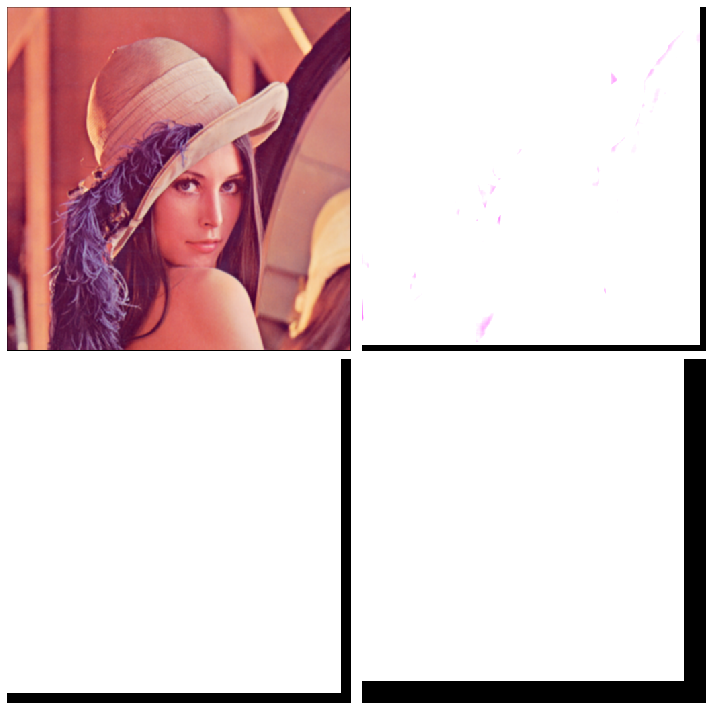

In [449]:
# Show images
IMAGE_SIZE=[10,10]
show_subplots_image(images_to_plot_filtered, 2, 2, IMAGE_SIZE)

<b>Exercício 3</b> - Neste exercício, vamos examinar a resposta em frequência dos seguintes filtros espaciais.

a) Converta os filtros h1 e h2 para  o domínio da frequência. Visualize o módulo de cada filtro. Obs: Para visualizar melhor a resposta do filtro no domínio da frequência desloque a freq. (0,0) para o centro da imagem.

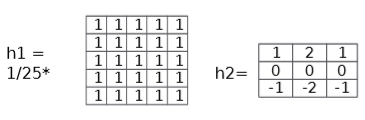

In [283]:
def gerar_modulo(image_list, s:tuple=None, transform=None):
    fft_image = [np.fft.fft2(image_mod, s=s) for image_mod in image_list]    
    fft_filters_shift = [np.fft.fftshift(image_mod) for image_mod in fft_image]
    
    if transform == None:
        return [np.abs(fft_image) for fft_image in fft_filters_shift]
    else:
        return [np.abs(transform(fft_image)) for fft_image in fft_filters_shift]

In [282]:
def gerar_modulo_imagem_filtrada(image_mod_filt, filter_list):
    fft_filters_shift_abs = gerar_modulo(filter_list, s=image_mod_filt.shape)
    fft_image = np.fft.fft2(image_mod_filt)
    fft_image_shift = np.fft.fftshift(fft_image)
    fft_image_filtered_list = [fft_image_shift*filter_ex4 for filter_ex4 in fft_filters_shift_abs]
    ifft_shift_image_filtered_list = [np.fft.ifftshift(fft_image_filt) for fft_image_filt in fft_image_filtered_list]
    img_back_list = [np.fft.ifft2(image_ifft_filt) for image_ifft_filt in ifft_shift_image_filtered_list]
    return [abs(image_complex) for image_complex in img_back_list]

In [225]:
# Generate filters
filters_list = list([np.dot(1/25,np.ones((5,5))), 
                     np.array([[1,2,1], [0,0,0],[-1,-2,-1]])])

IMAGE_SIZE = [8,8]

In [276]:
# Filtros
row_size, col_size, _ = original_image.shape
fft_filters_shift_abs = gerar_modulo(filters_list, s=(row_size, col_size))

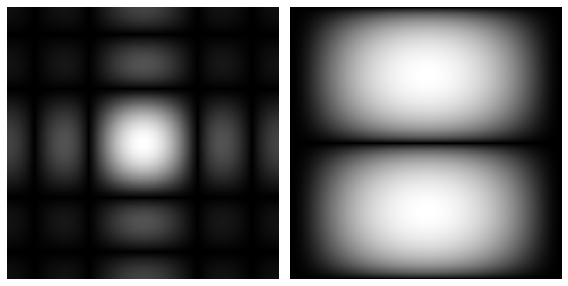

In [277]:
# Show images
show_subplots_image(mag_spectrum, 1, 2, IMAGE_SIZE, cmap='gray')

b) Filtre, no domínio da frequência, três imagens (diferentes) com cada um dos dois filtro. Em seguida, tire a transformada inversa. O resultado da filtragem espacial é  o mesmo de filtragem no domínio da frequência? Justifique.

In [240]:
# Carregar as imagens
images_path = ['imagens/th35SNIA8N.jpg', 'imagens/thBRXJU7EY.jpg', 'imagens/1200px-Scorbunny.png']
images_list_ex4 = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in images_path]
for img_index, image in enumerate(images_list):
    images_list[img_inedx] = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    images_list[img_index] = \
        cv2.normalize(images_list[img_index],None,alpha=0,beta=1, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)  

In [241]:
fft_filters_shift_abs = gerar_modulo(images_list, transform=np.log)

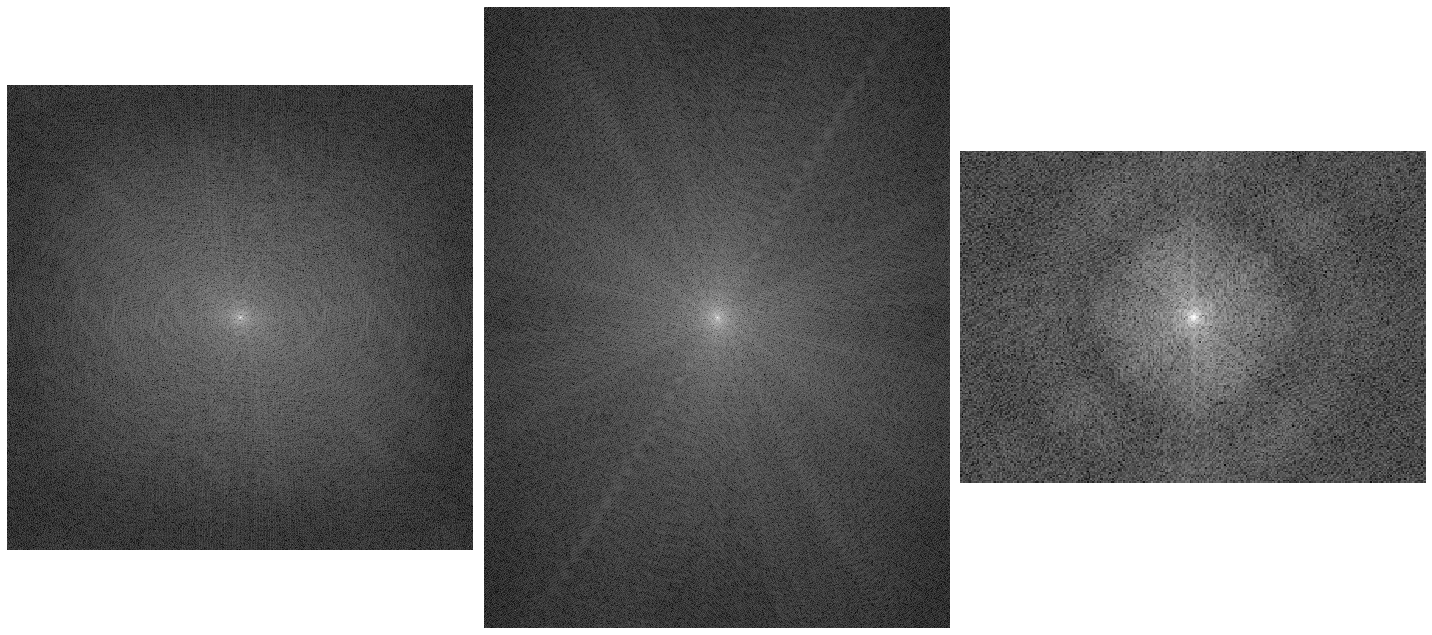

In [242]:
# Show images
show_subplots_image(fft_filters_shift_abs, 1, 3, [20,20], 'gray')

In [284]:
# Filtrar imagens
img_back_abs_list = [gerar_modulo_imagem_filtrada(image_ex4, filters_list) for image_ex4 in images_list_ex4]

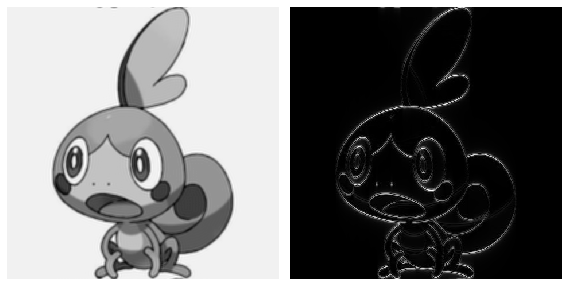

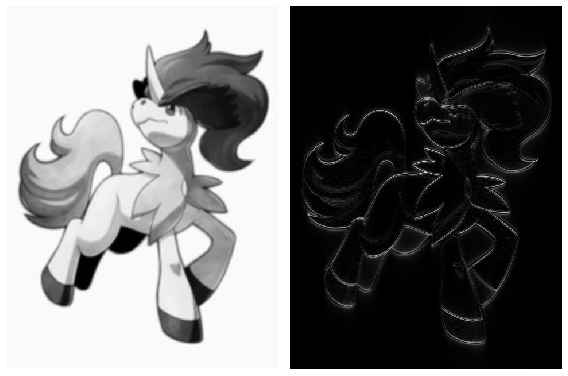

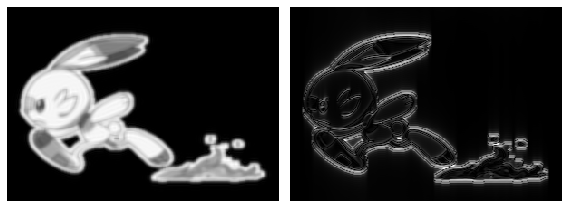

In [285]:
# Show images
for subplot_image in img_back_abs_list:
    show_subplots_image(subplot_image, 1, 2, IMAGE_SIZE, 'gray')

In [215]:
# Filtragem espacial
image_filtragem_espacial = [filtragem_espacial(image, filter) for image in images_list for filter in filters_list]

NameError: name 'filtragem_espacial' is not defined

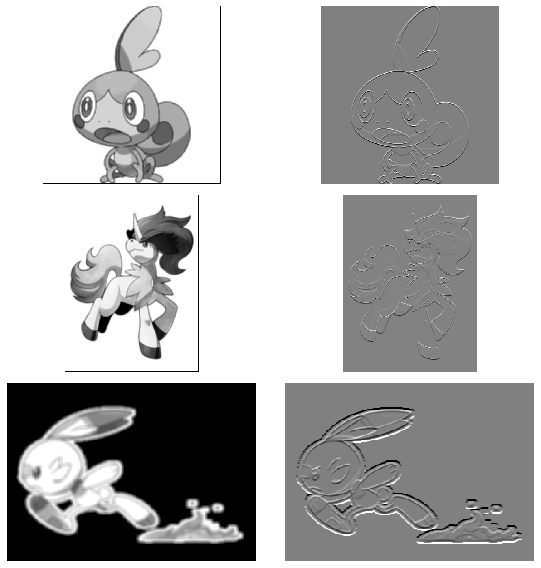

In [210]:
# Show images
show_subplots_image(image_filtragem_espacial, 3, 2, IMAGE_SIZE, 'gray')

<b>Exercício 4</b>

a) Tire a transformada das imagens noiseball.png e footBallOrig.png (enviadas juntas com a atividade). Visualize o módulo destas transformadas. Há alguma diferença?  É possível recuperar a imagem noiseball.png  e eliminar o ruído? Justifique sua resposta.

In [216]:
# Carregar as imagens
images_list_ball_path = ['imagens/footBallOrig.png', 'imagens/noiseball.png']
images_list_ball = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in images_list_ball_path]
for img_inedx, image in enumerate(images_list_ball):
#     images_list[img_inedx] = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    images_list[img_inedx] = \
        cv2.normalize(images_list[img_inedx],None,alpha=0,beta=1, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)

In [291]:
fft_filters_shift_abs_ball = gerar_modulo(images_list_ball, transform=np.log)

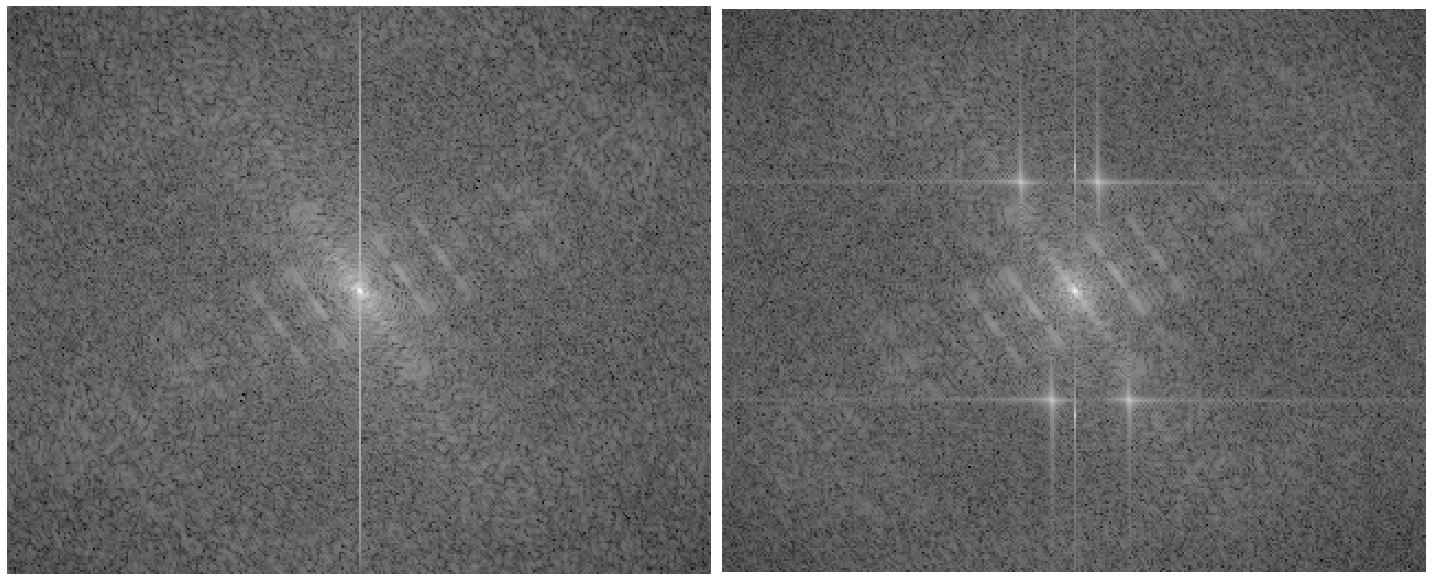

In [292]:
# Show images
show_subplots_image(fft_filters_shift_abs_ball, 1, 2, [20,20], 'gray')

 b) Tire a transformada inversa da imagem filtrada e visualize o resultado. Comente.

In [428]:
# Filtro
filters_list_ball = list([np.array(np.dot(1/25,[[1,4,4,4,1], [1,4,4,4,1], [1,4,4,4,1], [1,4,4,4,1], [1,4,4,4,1]]))])

In [429]:
# Filtrar imagens
img_back_abs_list = gerar_modulo_imagem_filtrada(images_list_ball[1], filters_list_ball)

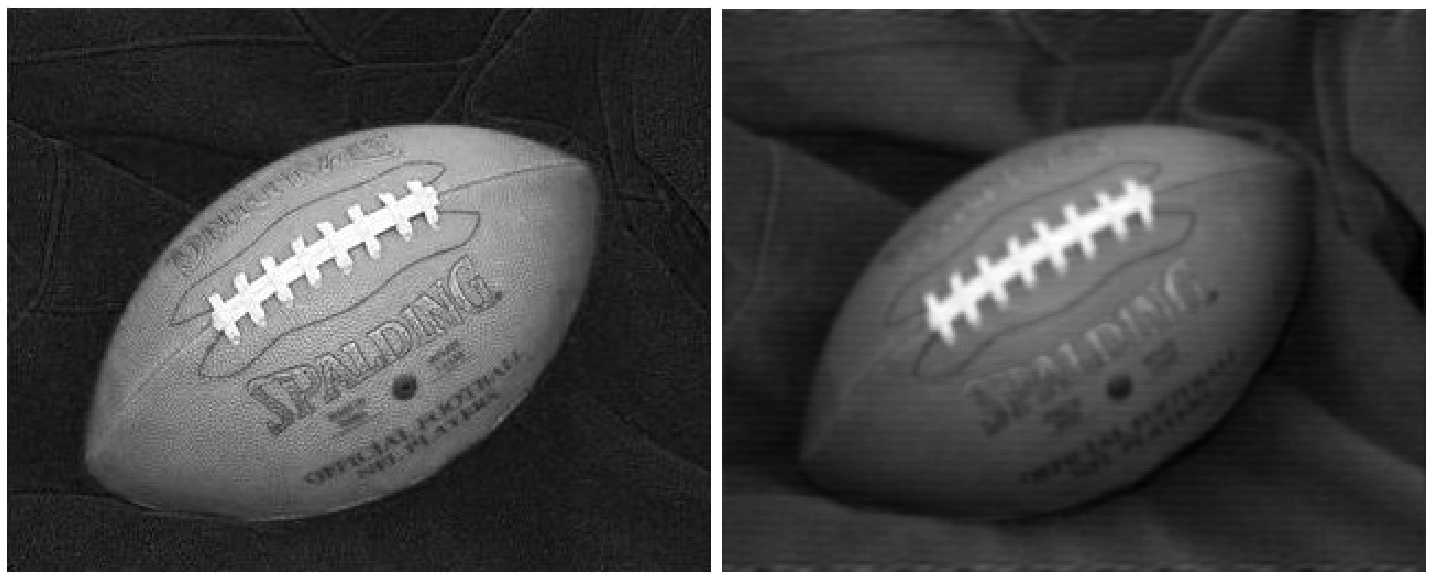

In [430]:
# Show images
final_image_filtered = [images_list_ball[0], img_back_abs_list[0]]
show_subplots_image(final_image_filtered, 1, 2, [20,20], 'gray')